In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [185]:
df = pd.read_csv('loan.csv')  #importing dataset using pandas
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [186]:
df.shape  #checking dimensions of data

(39717, 111)

In [187]:
columns = [i.strip().lower() for i in df.columns.to_list()]  #removing white spaces and converting column names to lower case to maintain linearity
df.columns = columns #Assigning columns back to dataframe
print(df.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [188]:
df.isnull().sum()  #checking null values in dataset

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [189]:
df.info()  #checking column datatypes and data attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#####  Consumer Attributes

In [190]:
#filtering consumer related attributes
df_consumer = df[['id','member_id','emp_title','emp_length','home_ownership','annual_inc','zip_code','addr_state','loan_status']]
df_consumer.head()

,id,member_id,emp_title,emp_length,home_ownership,annual_inc,zip_code,addr_state,loan_status
0,1077501,1296599,NaN,10+ years,RENT,24000.0,860xx,AZ,Fully Paid
1,1077430,1314167,Ryder,< 1 year,RENT,30000.0,309xx,GA,Charged Off
2,1077175,1313524,NaN,10+ years,RENT,12252.0,606xx,IL,Fully Paid
3,1076863,1277178,AIR RESOURCES BOARD,10+ years,RENT,49200.0,917xx,CA,Fully Paid
4,1075358,1311748,University Medical Group,1 year,RENT,80000.0,972xx,OR,Current


In [191]:
df_consumer['member_id'].value_counts()  #checking duplicate entries of any consumer

1296599    1
731393     1
731544     1
729629     1
731390     1
          ..
989001     1
988993     1
988959     1
988954     1
86999      1
Name: member_id, Length: 39717, dtype: int64

In [192]:
df_consumer.isnull().sum()  #checking null values in consumer attributes data

id                   0
member_id            0
emp_title         2459
emp_length        1075
home_ownership       0
annual_inc           0
zip_code             0
addr_state           0
loan_status          0
dtype: int64

In [193]:
df_consumer.shape

(39717, 9)

In [194]:
df_consumer.dropna(inplace = True)  #Removinf NaN values from data
df_consumer.shape

(37202, 9)

In [195]:
df_consumer['emp_title'].value_counts().sort_values(ascending = False)  #checking emp_title distribution in data

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Avian Realty                           1
American Energy                        1
BASF Chemical Company                  1
Crown-Kerasotes Show-ASI Security      1
Evergreen Center                       1
Name: emp_title, Length: 28775, dtype: int64

In [196]:
df_consumer['loan_status'].value_counts()  #checking the loan status distribution

Fully Paid     31005
Charged Off     5131
Current         1066
Name: loan_status, dtype: int64

In [197]:
def bar_chart_counts(x,column):
    
    plt.figure(figsize=(10,5))               #To plot bar charts
    x.plot(kind = 'bar')
    plt.xlabel(column)
    plt.ylabel('loan status counts')
    plt.title('loan_status Distribution')
    plt.show()

In [198]:
def stacked_chart(df,col1,col2):
                                         #To plot stacked charts
    df.groupby([col1])[col2].value_counts().unstack().plot(kind = 'bar', stacked = True, figsize = (20,10))
    
    return

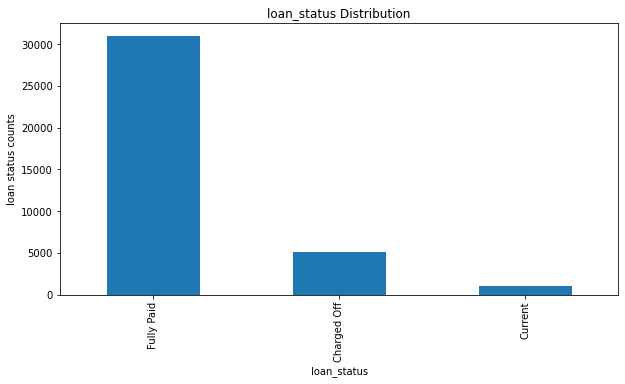

In [199]:
x = df_consumer['loan_status'].value_counts().sort_values(ascending = False)
bar_chart_counts(x,'loan_status')

As we can see from the bar chart that fully paid consumers are more than charged off followed by current

##### Consumer Attributes vs Charged Off Analysis

In [200]:
#charged off consumers

df_ch_off = df_consumer[df_consumer['loan_status']=='Charged Off']
df_ch_off.reset_index(drop = True, inplace = True)
df_ch_off.head()

,id,member_id,emp_title,emp_length,home_ownership,annual_inc,zip_code,addr_state,loan_status
0,1077430,1314167,Ryder,< 1 year,RENT,30000.0,309xx,GA,Charged Off
1,1071570,1306721,Starbucks,< 1 year,RENT,15000.0,774xx,TX,Charged Off
2,1064687,1298717,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.0,245xx,VA,Charged Off
3,1069057,1303503,SFMTA,3 years,RENT,100000.0,951xx,CA,Charged Off
4,1039153,1269083,Osram Sylvania,10+ years,RENT,105000.0,335xx,FL,Charged Off


In [201]:
top_10_cons_ch_off = df_ch_off['emp_title'].value_counts().sort_values(ascending = False)[:10]
#top 10 charged off consumers with emp title

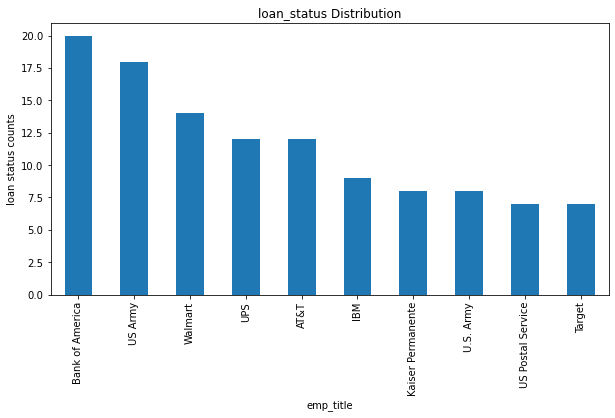

In [202]:
bar_chart_counts(top_10_cons_ch_off,'emp_title')

The distribution clearly states that in charged off consumer most of the consumers belong to Bank of America. These are top 10 consumers in charged off segment.

###### emp_length vs Charged off

In [203]:
df_emp_length  = df_ch_off[~(df_ch_off['emp_length'].isnull())]
df_emp_length.head()

,id,member_id,emp_title,emp_length,home_ownership,annual_inc,zip_code,addr_state,loan_status
0,1077430,1314167,Ryder,< 1 year,RENT,30000.0,309xx,GA,Charged Off
1,1071570,1306721,Starbucks,< 1 year,RENT,15000.0,774xx,TX,Charged Off
2,1064687,1298717,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.0,245xx,VA,Charged Off
3,1069057,1303503,SFMTA,3 years,RENT,100000.0,951xx,CA,Charged Off
4,1039153,1269083,Osram Sylvania,10+ years,RENT,105000.0,335xx,FL,Charged Off


In [204]:
emp_length_charged_off = df_emp_length['emp_length'].value_counts().sort_values(ascending = False)

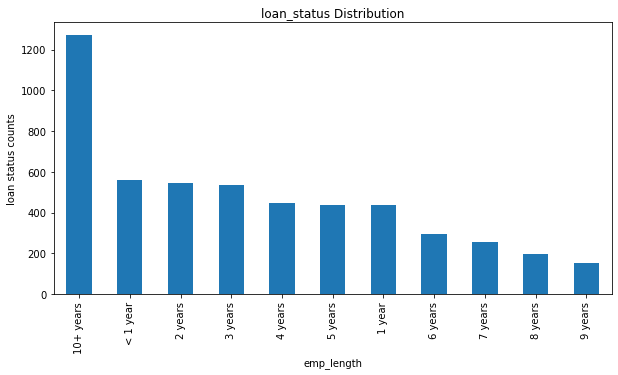

In [205]:
bar_chart_counts(emp_length_charged_off,'emp_length')

As we can see that consumers who are having more than 10+ years of experience are having more charged off than consumers who are having less years of experience.

In [206]:
df_emp_length['home_ownership'].unique()  # Checking the unique values in home ownership

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

##### Bi-variate analysis

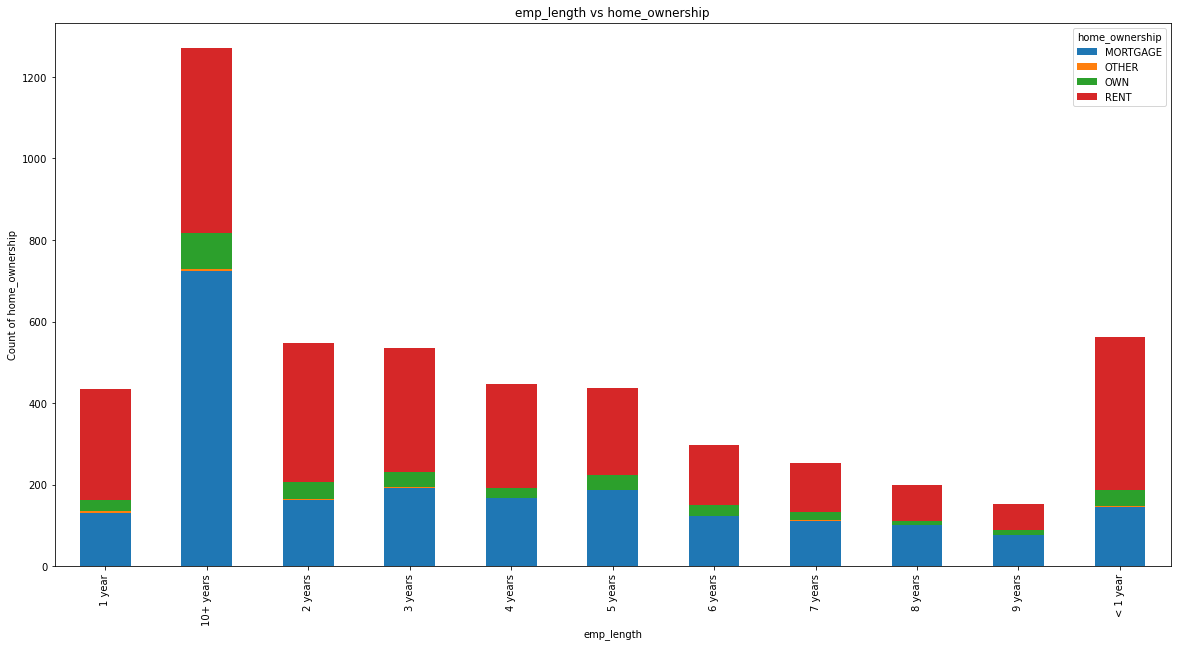

In [207]:
stacked_chart(df_emp_length,'emp_length','home_ownership')
plt.title('emp_length vs home_ownership')
plt.ylabel('Count of home_ownership')
plt.show()

As we can see that in 10+ years of employment length people are more into mortgage. Also we can observe from the stacked chart, we can see that most of the consumers below 10 years are on rent. So, can we see that in 10+ years of experience which are more into charged off depending upon the home_ownership?

In [208]:
df_emp_length['emp_length'].unique()  #checking unique values in emp_length

array(['< 1 year', '3 years', '10+ years', '1 year', '9 years', '2 years',
       '8 years', '4 years', '7 years', '5 years', '6 years'],
      dtype=object)

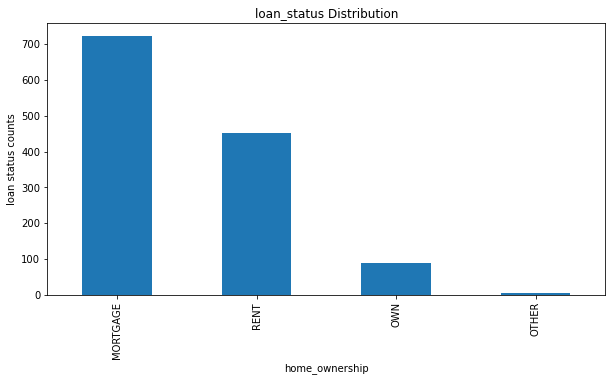

In [209]:
#consumer with emp_length 10+ years

df_10 = df_emp_length[df_emp_length['emp_length']=='10+ years']
x = df_10['home_ownership'].value_counts().sort_values(ascending = False)
bar_chart_counts(x,'home_ownership')

As we can see from our analysis that in 10+ years of employment length, consumer in mortgage are mostly charged off followed by consumers on rent.This can be one factor when providing loans to consumer to check if they belong to 10+ years of experience they must not come in Mortgage otherwise on rent as well and provide low value loan or no loan to those type of consumers.

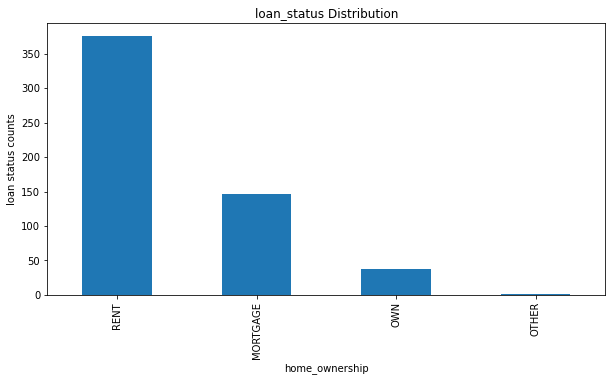

In [210]:
#consumer with emp_length < 1 year
df_less_than_1_yr = df_emp_length[df_emp_length['emp_length']=='< 1 year']
x = df_less_than_1_yr['home_ownership'].value_counts().sort_values(ascending = False)
bar_chart_counts(x,'home_ownership')

As we can see from our analysis that in employment length <1 year, consumer in rent are mostly charged off followed by consumers on mortgage.This can be one factor when providing loans to consumer to check if they belong to experience <1 year they must not come in rent and provide low value loan or no loan to those type of consumers.

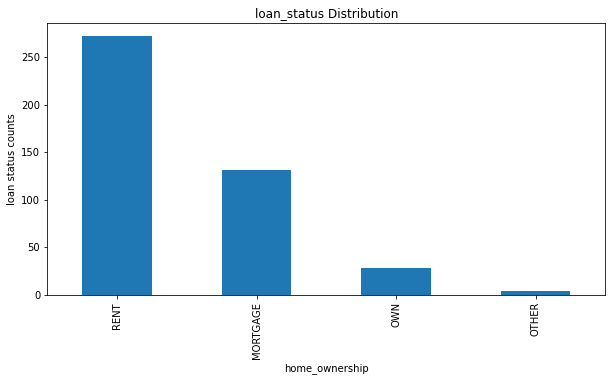

In [211]:
#consumer with emp_length = 1 year

df_1_yr = df_emp_length[df_emp_length['emp_length']=='1 year']
x = df_1_yr['home_ownership'].value_counts().sort_values(ascending = False)
bar_chart_counts(x,'home_ownership')

As we can see from our analysis that in employmeny length =1 year, consumer in rent are mostly charged off followed by consumers on mortgage.This can be one factor when providing loans to consumer to check if they belong to experience =1 year they must not come in rent and provide low value loan or no loan to those type of consumers whereas for mortgage small amount of loan may be possible on higher interest rate for good business.

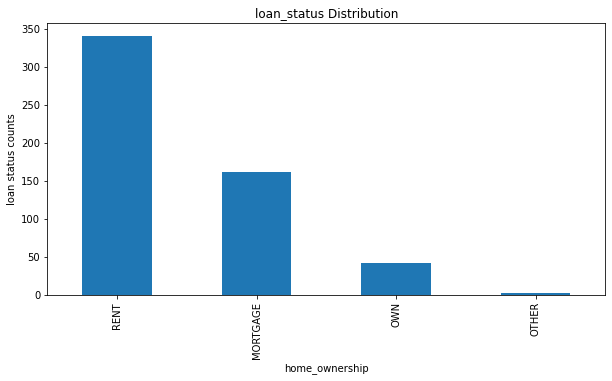

In [212]:
#consumer with emp_length = 2 years

df_2_yr = df_emp_length[df_emp_length['emp_length']=='2 years']
x = df_2_yr['home_ownership'].value_counts().sort_values(ascending = False)
bar_chart_counts(x,'home_ownership')

As we can see from our analysis that in employmeny length =2 year, consumer in rent are mostly charged off followed by consumers on mortgage.This can be one factor when providing loans to consumer to check if they belong to experience =2 year they must not come in rent and provide low value loan or no loan to those type of consumers whereas for mortgage small amount of loan may be possible on higher interest rate for good business.

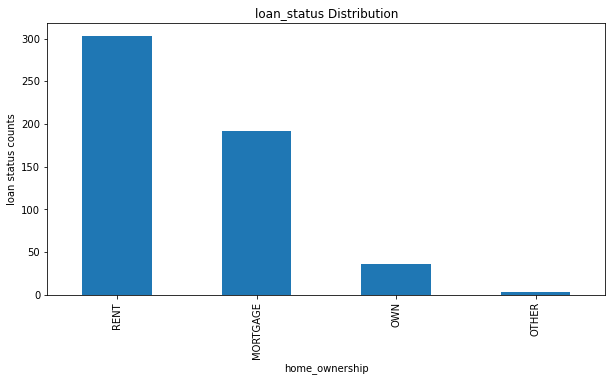

In [213]:
#consumer with emp_length = 3 years

df_3_yr = df_emp_length[df_emp_length['emp_length']=='3 years']
x = df_3_yr['home_ownership'].value_counts().sort_values(ascending = False)
bar_chart_counts(x,'home_ownership')

As we can see from our analysis that in employmeny length =3 years, consumer in rent are mostly charged off followed by consumers on mortgage.This can be one factor when providing loans to consumer to check if they belong to experience =3 years they must not come in rent and provide low value loan or no loan to those type of consumers whereas for mortgage small amount of loan may be possible on higher interest rate for good business.

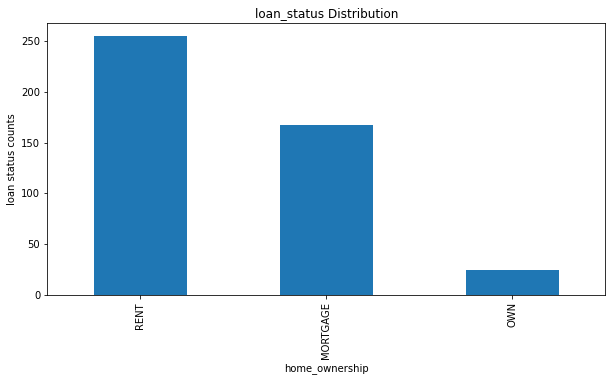

In [214]:
#consumer with emp_length = 4 years

df_4_yr = df_emp_length[df_emp_length['emp_length']=='4 years']
x = df_4_yr['home_ownership'].value_counts().sort_values(ascending = False)
bar_chart_counts(x,'home_ownership')

As we can see from our analysis that in employmeny length =4 years, consumer in rent are mostly charged off followed by consumers on mortgage.This can be one factor when providing loans to consumer to check if they belong to experience =4 years they must not come in rent and provide low value loan or no loan to those type of consumers whereas for mortgage small amount of loan may be possible on higher interest rate for good business.

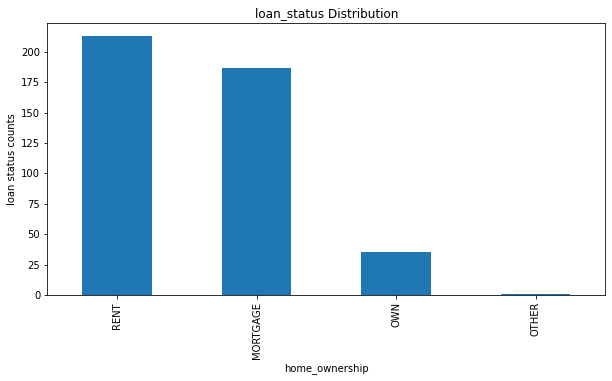

In [215]:
#consumer with emp_length = 5 years

df_5_yr = df_emp_length[df_emp_length['emp_length']=='5 years']
x = df_5_yr['home_ownership'].value_counts().sort_values(ascending = False)
bar_chart_counts(x,'home_ownership')

As we can see from our analysis that in employment length =5 year, consumer in rent are mostly charged off followed by consumers on mortgage.This can be one factor when providing loans to consumer to check if they belong to experience =5 year they must not come in rent or mortgage to avail loan from LC.

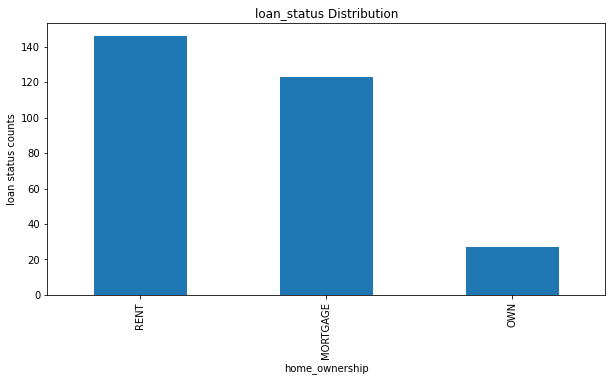

In [216]:
#consumer with emp_length = 6 years

df_6_yr = df_emp_length[df_emp_length['emp_length']=='6 years']
x = df_6_yr['home_ownership'].value_counts().sort_values(ascending = False)
bar_chart_counts(x,'home_ownership')

As we can see from our analysis that in employment length =6 years, consumer in rent are mostly charged off followed by consumers on mortgage.This can be one factor when providing loans to consumer to check if they belong to experience =6 years they must not come in rent or mortgage to avail loan from LC.

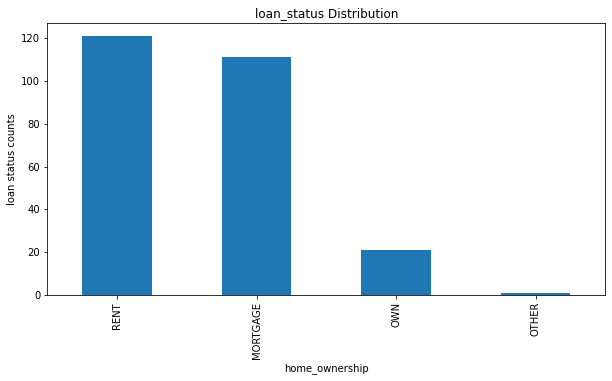

In [217]:
#consumer with emp_length = 7 years

df_7_yr = df_emp_length[df_emp_length['emp_length']=='7 years']
x = df_7_yr['home_ownership'].value_counts().sort_values(ascending = False)
bar_chart_counts(x,'home_ownership')

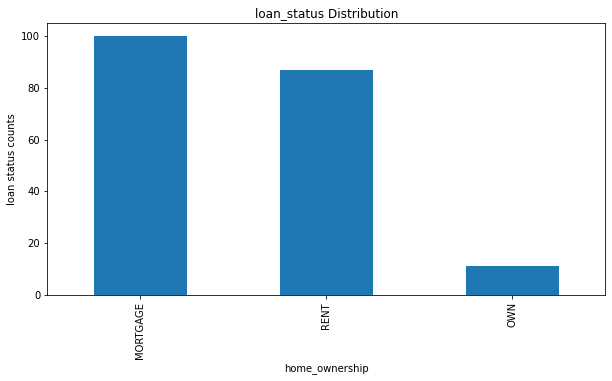

In [218]:
#consumer with emp_length = 8 years

df_8_yr = df_emp_length[df_emp_length['emp_length']=='8 years']
x = df_8_yr['home_ownership'].value_counts().sort_values(ascending = False)
bar_chart_counts(x,'home_ownership')

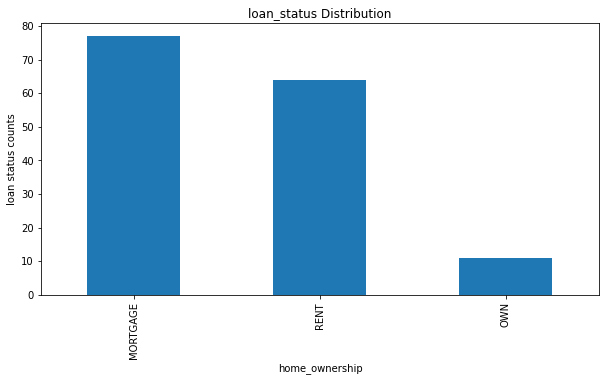

In [219]:
#consumer with emp_length = 9 years

df_9_yr = df_emp_length[df_emp_length['emp_length']=='9 years']
x = df_9_yr['home_ownership'].value_counts().sort_values(ascending = False)
bar_chart_counts(x,'home_ownership')

As we can see from 7,8 ,9 years of emp length charts that as the emp length is increasing consumers are generally started to fall in mortgage segment. Hence, we can conclude that consumers with higher experience should not fall in mortgage to avail loan from LC.

##### Home Ownership vs Loan status

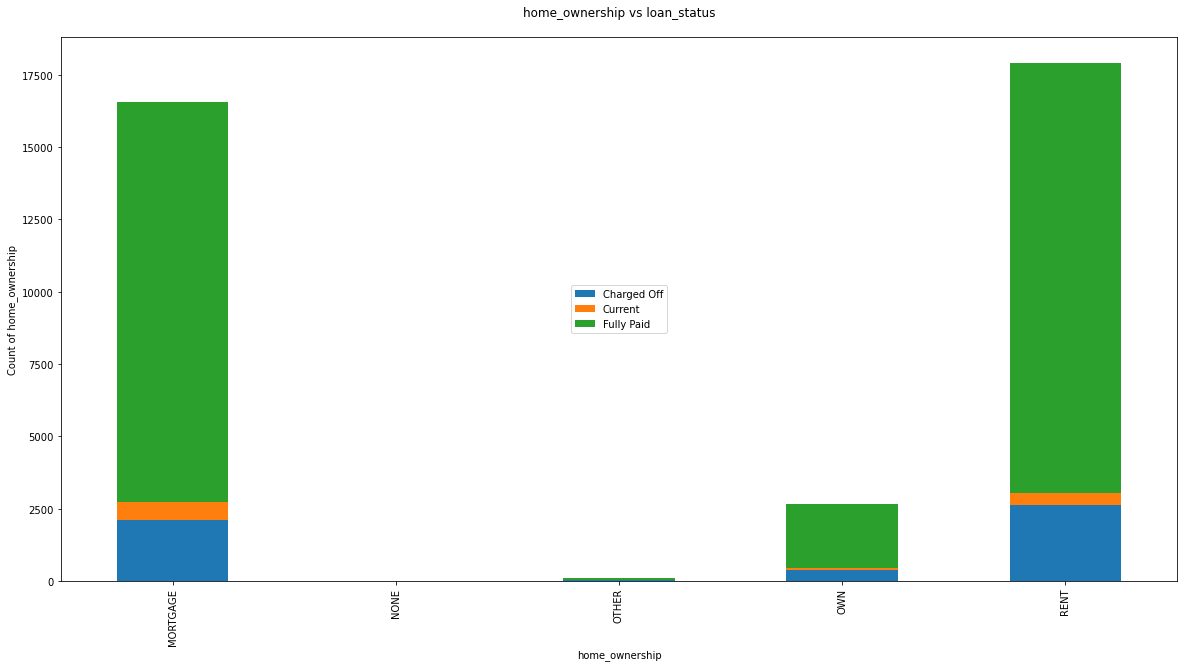

In [220]:
stacked_chart(df_consumer,'home_ownership','loan_status')
plt.legend(loc = 'center')
plt.title('home_ownership vs loan_status\n')
plt.ylabel('Count of home_ownership')
plt.show()

As we can see that Fully Paid & charged off are more in mortgage and rent home ownerrship, but as we saw above that home_ownership and emp_length are both driving factor from consumer attributes point of view. Hence, we should consider emp_length along with home_ownership to offer loans to consumers.

##### Annual Income vs loan status

In [221]:
#created bins of annual_inc with labels low, medium & high salary

df_ann_inc = df_consumer.copy()
df_ann_inc['annual_income_bins'] = pd.qcut(x = df_ann_inc['annual_inc'], q = 3,precision = 5,labels = ['low','medium','high'])
print(df_ann_inc.isnull().sum()) #checking null values after binning of annual income
df_ann_inc.head()

id                    0
member_id             0
emp_title             0
emp_length            0
home_ownership        0
annual_inc            0
zip_code              0
addr_state            0
loan_status           0
annual_income_bins    0
dtype: int64


,id,member_id,emp_title,emp_length,home_ownership,annual_inc,zip_code,addr_state,loan_status,annual_income_bins
1,1077430,1314167,Ryder,< 1 year,RENT,30000.0,309xx,GA,Charged Off,low
3,1076863,1277178,AIR RESOURCES BOARD,10+ years,RENT,49200.0,917xx,CA,Fully Paid,medium
4,1075358,1311748,University Medical Group,1 year,RENT,80000.0,972xx,OR,Current,high
5,1075269,1311441,Veolia Transportaton,3 years,RENT,36000.0,852xx,AZ,Fully Paid,low
6,1069639,1304742,Southern Star Photography,8 years,RENT,47004.0,280xx,NC,Fully Paid,low


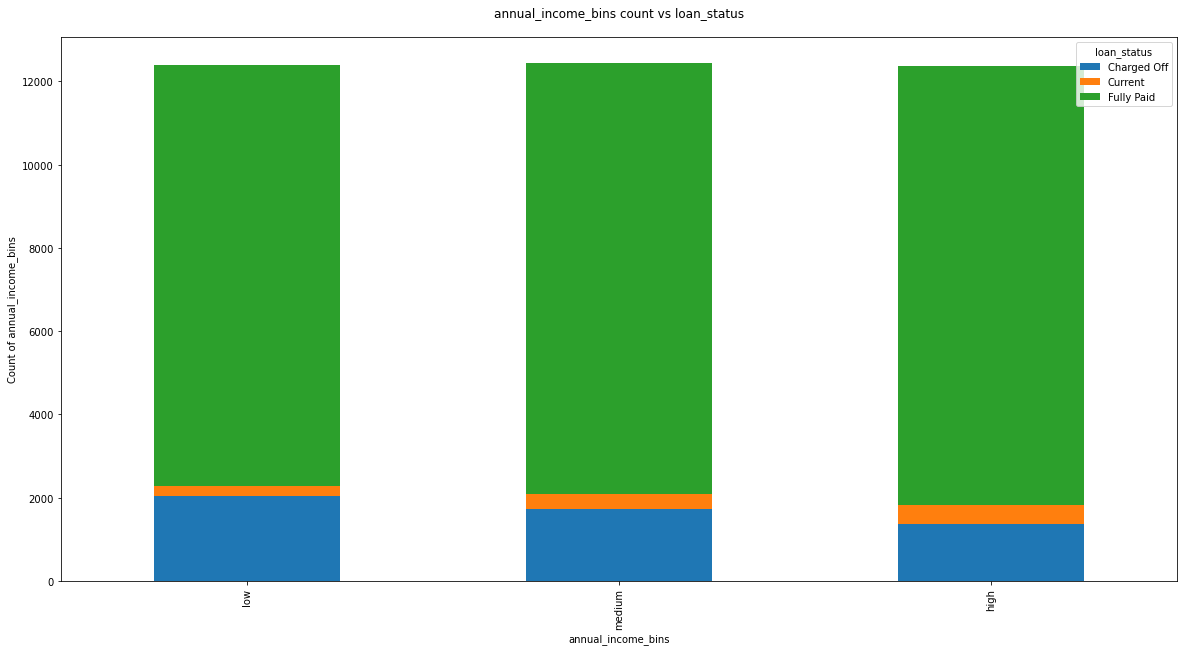

In [222]:
stacked_chart(df_ann_inc,'annual_income_bins','loan_status')
plt.title('annual_income_bins count vs loan_status\n')   #creating stacked chart for annual_income_bins vs loan_status
plt.ylabel('Count of annual_income_bins')
plt.show()

The bins are created using annual income and allocated categories like low, medium & high. As we can see that in low & medium categories charged off are more compared to high category of annual income. So, in this case LC can give lesser amount/no loans to these categories of consumers.

##### Zip Code, State vs loan_status

In [223]:
df_consumer['zip_code'].value_counts()  #unique categories in zip code along with their counts

100xx    564
945xx    514
112xx    490
606xx    481
070xx    454
        ... 
736xx      1
831xx      1
090xx      1
677xx      1
469xx      1
Name: zip_code, Length: 818, dtype: int64

In [224]:
#filtering for charged off consumer to analyse zip code vs charged off
df_zip = df_consumer[df_consumer['loan_status'] == 'Charged Off']
df_zip.head()

,id,member_id,emp_title,emp_length,home_ownership,annual_inc,zip_code,addr_state,loan_status
1,1077430,1314167,Ryder,< 1 year,RENT,30000.0,309xx,GA,Charged Off
9,1071570,1306721,Starbucks,< 1 year,RENT,15000.0,774xx,TX,Charged Off
12,1064687,1298717,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.0,245xx,VA,Charged Off
14,1069057,1303503,SFMTA,3 years,RENT,100000.0,951xx,CA,Charged Off
21,1039153,1269083,Osram Sylvania,10+ years,RENT,105000.0,335xx,FL,Charged Off


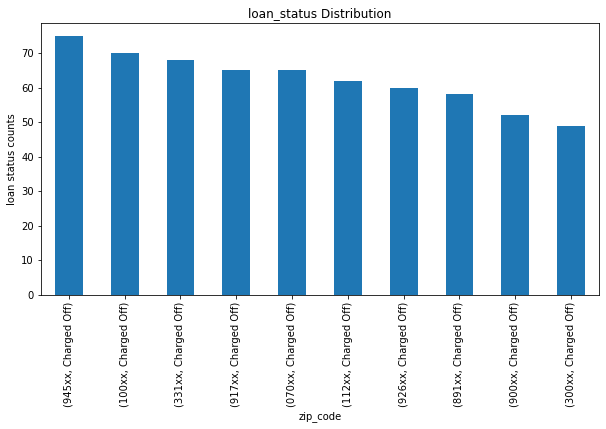

In [226]:
x = df_zip.groupby(['zip_code'])['loan_status'].value_counts().sort_values(ascending = False)[:10]
bar_chart_counts(x,'zip_code')

As we can see from the chart these are top 10 consumers who are charged off so LC should consider zip codes while providing loans to consumers.

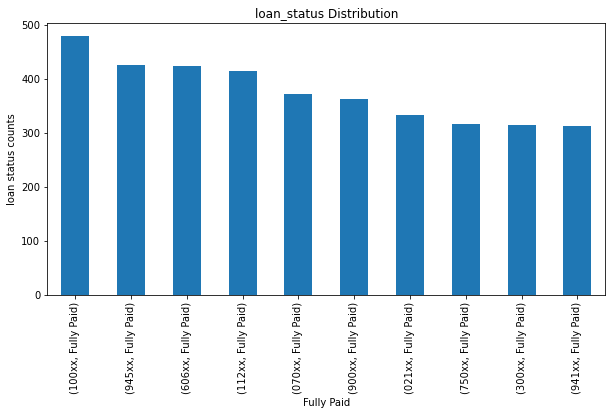

In [227]:
df_zip = df_consumer[df_consumer['loan_status'] == 'Fully Paid']
x = df_zip.groupby(['zip_code'])['loan_status'].value_counts().sort_values(ascending = False)[:10]
bar_chart_counts(x,'Fully Paid')


As we can see from the bar chart that consumer zip code which are present in charged off are also present in fully paid. Also we can see that similar consumers zip code in charged off have fully paid maximum no of times loan. Hence, while lending loans we can offer loans to them at nominal amount or as decided by business.

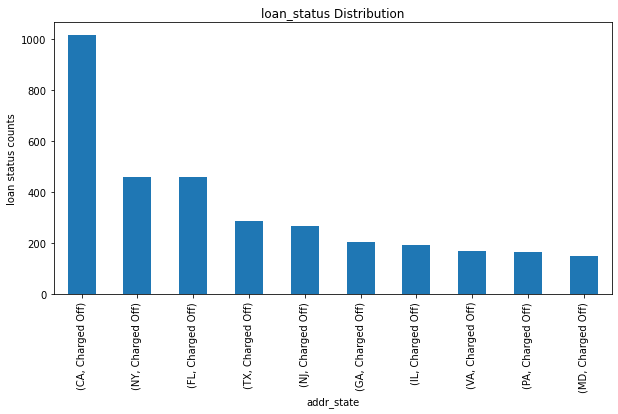

In [228]:
#filtering for states

df_states = df_consumer[df_consumer['loan_status']=='Charged Off']
x = df_states.groupby(['addr_state'])['loan_status'].value_counts().sort_values(ascending = False)[:10]
bar_chart_counts(x,'addr_state')

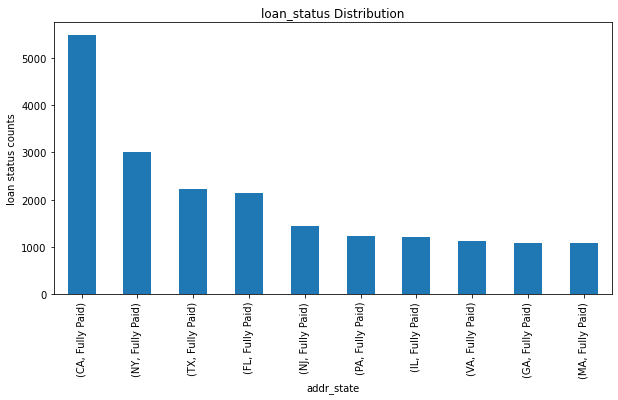

In [229]:
#filtering for states

df_states = df_consumer[df_consumer['loan_status']=='Fully Paid']
x = df_states.groupby(['addr_state'])['loan_status'].value_counts().sort_values(ascending = False)[:10]
bar_chart_counts(x,'addr_state')

As we can see that CA state has most no of charged off so while offering loans to those consumers who belong to CA state should be considered. Along with this zip code is an important factor while offering loans to consumer since state is an aggregated values but we must consider at granular level while offering loan to consumers.

##### Consumer Attributes - Conclusion

1) Emp title must be checked like organisation name and where consumer work.

2) Emp length is an important factor as we saw consumer with more than 10+ years of experience are more into charged off than consumer with less years of experience. Along with we saw that emp_length and home ownership were important drivers for charged off consumers.

3) Zip code at granular level can also be taken into account but as we saw that few zip codes were both in fully charged and charged off with maximum times paying as fully charged hence while offering loans to those zip code consumers LC can offer attractive loans with good interest rates.

##### Loan Attributes

In [230]:
df_loan = pd.read_csv('loan.csv')
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [231]:
print(df_loan.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

In [232]:
#Filtering loan attributes

data_loan = df_loan[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'verification_status', 'issue_d', 'loan_status','purpose',
'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc','out_prncp','out_prncp_inv',
'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med','pub_rec_bankruptcies']]

In [233]:
data_loan.isnull().sum()  #checking null values

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
verification_status               0
issue_d                           0
loan_status                       0
purpose                           0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq        25682
mths_since_last_record        36931
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                       50
total_acc                         0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp             

In [234]:
data_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,verification_status,issue_d,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,Verified,Dec-11,...,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Source Verified,Dec-11,...,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,Not Verified,Dec-11,...,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,Source Verified,Dec-11,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,Source Verified,Dec-11,...,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0


In [235]:
data_loan.info()  #checking data types of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   verification_status         39717 non-null  object 
 9   issue_d                     39717 non-null  object 
 10  loan_status                 39717 non-null  object 
 11  purpose                     39717 non-null  object 
 12  dti                         39717 non-null  float64
 13  delinq_2yrs                 397

In [236]:
data_loan['int_rate'] = data_loan['int_rate'].replace('%','', regex = True)  #Removing % sign in int_rate column and converting from string to float and dividing it by 100
data_loan['int_rate'] = (data_loan['int_rate'].map(float))/100
data_loan['revol_util'] = data_loan['revol_util'].replace('%','', regex = True)  #Removing % sign in int_rate column and converting from string to float and dividing it by 100
data_loan['revol_util'] = (data_loan['revol_util'].map(float))/100
data_loan.head()
data_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,verification_status,issue_d,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,Verified,Dec-11,...,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0
1,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,Source Verified,Dec-11,...,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0
2,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,Not Verified,Dec-11,...,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0
3,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,Source Verified,Dec-11,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0
4,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,Source Verified,Dec-11,...,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0


In [237]:
data_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,verification_status,issue_d,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,Verified,Dec-11,...,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0
1,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,Source Verified,Dec-11,...,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0
2,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,Not Verified,Dec-11,...,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0
3,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,Source Verified,Dec-11,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0
4,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,Source Verified,Dec-11,...,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0


In [238]:
def plot_hist(data,column):
    
    #Distribution plot of interest rate of charged off consumers
    sns.displot(x = column,data = data_char_of, kde = True)
    plt.title(f"{column} Distribution\n")
    plt.show()
    
    return

In [239]:
# data_grade_ch_off = data_loan[data_loan['loan_status']]

In [240]:
data_loan['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

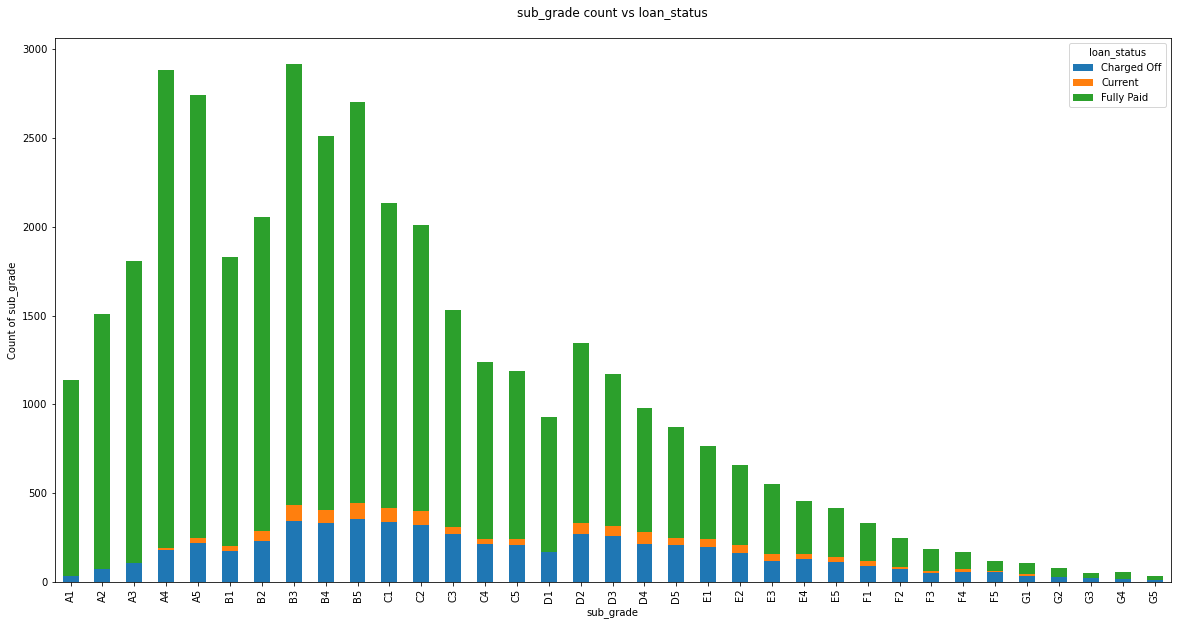

In [241]:
stacked_chart(data_loan,'sub_grade','loan_status')
plt.title('sub_grade count vs loan_status\n')   #creating stacked chart for sub_grade vs loan_status
plt.ylabel('Count of sub_grade')
plt.show()

1) As we can see from the chart for charged off consumers, most charged off consumers are falling in B5 sub_grade. There are other sub_grades as well where charged off consumers are falling.

2) As we can see from the chart for fully paid consumers, most Fully Paid consumers are falling in B3 sub_grade. There are other sub_grades as well where Fully paid consumers are falling.

Hence, as we saw above sub_grades are important when considering any consumers like charged_off, fully paid.

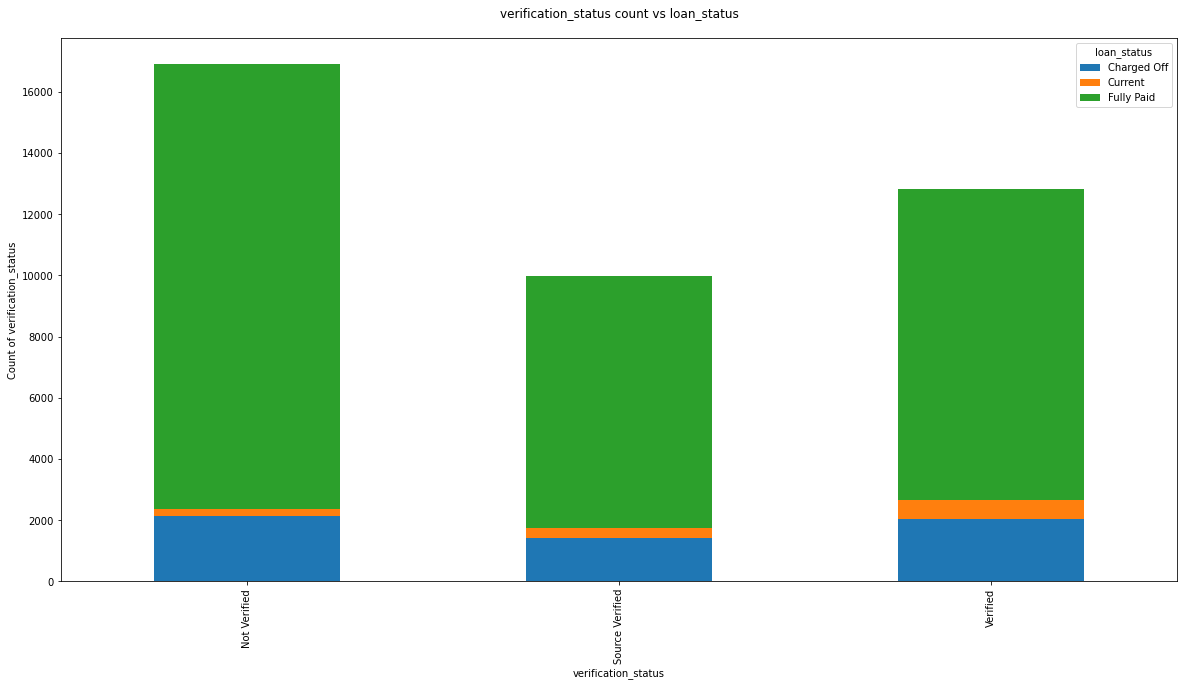

In [242]:
stacked_chart(data_loan,'verification_status','loan_status')
plt.title('verification_status count vs loan_status\n')   #creating stacked chart for verification_status vs loan_status
plt.ylabel('Count of verification_status')
plt.show()

As we can see from the chart that there are lot of consumers who have fully paid the loan irrespective of verification status. Also, if we see in charged off consumers it is less where Source Verified segments but more or less equal in Not Verified & Verified segments.

In [243]:
data_loan['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

##### Purpose vs loan_status

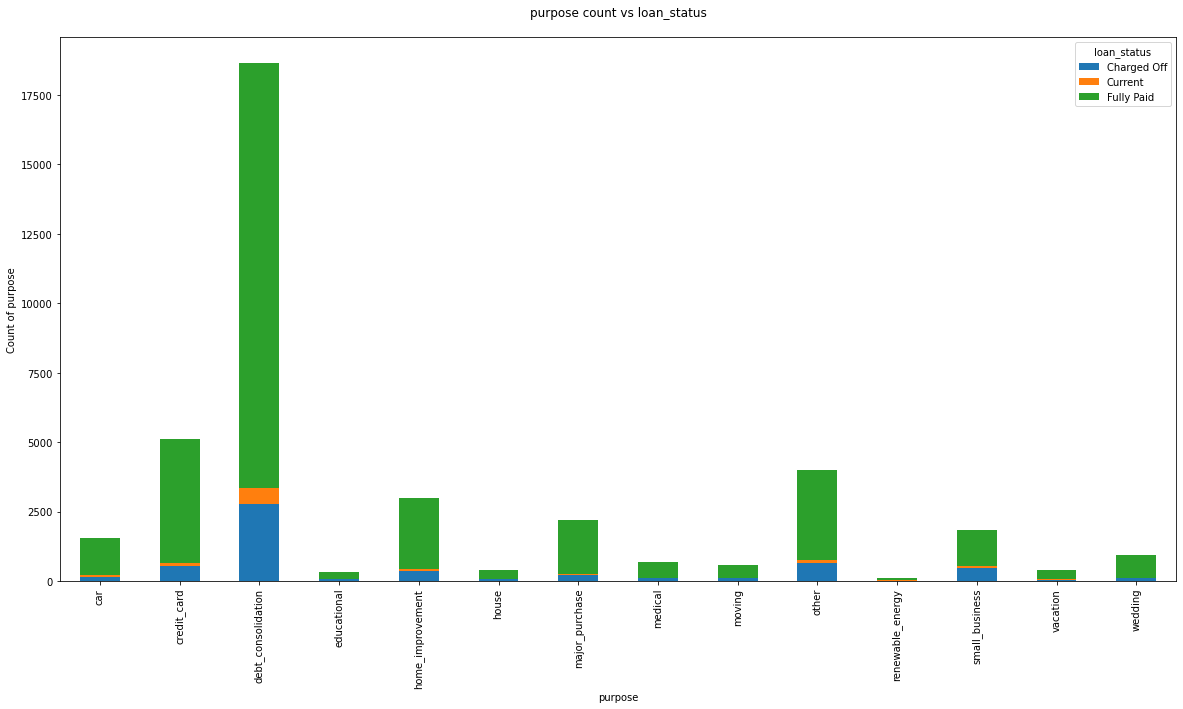

In [244]:
stacked_chart(data_loan,'purpose','loan_status')
plt.title('purpose count vs loan_status\n')   #creating stacked chart for purpose vs loan_status
plt.ylabel('Count of purpose')
plt.show()

1) As we can see from the chart that purpose of loan having debt_consolidation is high in charged off consumers followed by other purpose of loan like credit_card,other,small_business,major_purchase,car etc.

Hence, purpose can also be driving factor for charged off consumers

##### DTI vs loan_status

In [245]:
def calc_quantile(df,column):
    
    q_50 = df[column].quantile(0.5)     #Method to calculate 50th & 75th percentile
    q_75 = df[column].quantile(0.75)
    
    return q_50,q_75

In [246]:
def box_plt(df,column):
    
    df[column].plot.box(figsize = (10,5))   #Method to create box plot
    
    return

In [247]:
data_loan['dti'].isnull().sum()  #checking null values in dti column

0

In [248]:
data_loan_charge_off = data_loan[data_loan['loan_status']=='Charged Off']
data_loan_charge_off.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,verification_status,issue_d,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,pub_rec_bankruptcies
1,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,Source Verified,Dec-11,...,435.17,0.0,117.08,1.1100,Apr-13,119.66,NaN,Sep-13,0.0,0.0
8,5600,5600,5600.0,60 months,0.2128,152.39,F,F2,Source Verified,Dec-11,...,294.94,0.0,189.06,2.0900,Apr-12,152.39,NaN,Aug-12,0.0,0.0
9,5375,5375,5350.0,60 months,0.1269,121.45,B,B5,Verified,Dec-11,...,533.42,0.0,269.29,2.5200,Nov-12,121.45,NaN,Mar-13,0.0,0.0
12,9000,9000,9000.0,36 months,0.1349,305.38,C,C1,Source Verified,Dec-11,...,570.26,0.0,444.30,4.1600,Jul-12,305.38,NaN,Nov-12,0.0,0.0
14,10000,10000,10000.0,36 months,0.1065,325.74,B,B2,Source Verified,Dec-11,...,1393.42,0.0,645.10,6.3145,Oct-13,325.74,NaN,Mar-14,0.0,0.0


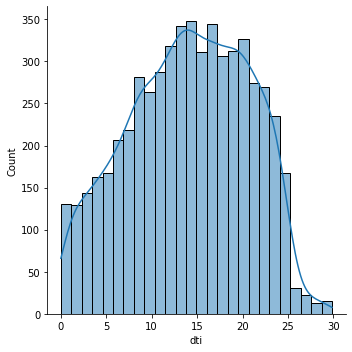

In [249]:
sns.displot(data = data_loan_charge_off, x = 'dti', kde = True)

In [250]:
q_50,q_75 = calc_quantile(data_loan_charge_off,'dti')

print('50th percentile:', q_50)
print('75th percentile:', q_75)  #50th and 75th percentile

50th percentile: 14.29
75th percentile: 19.29


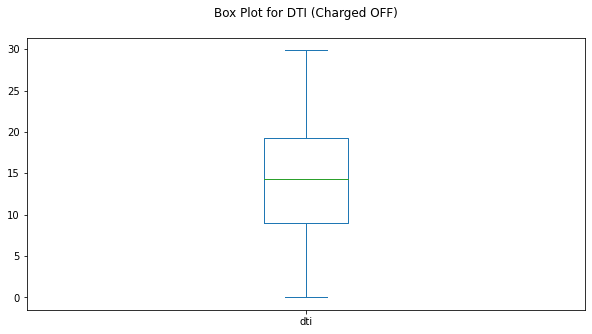

In [251]:
box_plt(data_loan_charge_off,'dti')
plt.title('Box Plot for DTI (Charged OFF)\n')
plt.show()

1)As we can see from the distribution plot that for charged off consumers that 50% of the consumers who are charged off have dti less than 14.29.

2) Also we can see that 75% of the charged of consumers have have dti less than 19.29

In [252]:
data_loan_full = data_loan[data_loan['loan_status']=='Fully Paid']

In [253]:
q_50,q_75 = calc_quantile(data_loan_full,'dti')

print('50th percentile:', q_50)
print('75th percentile:', q_75)  #50th and 75th percentile

50th percentile: 13.2
75th percentile: 18.39


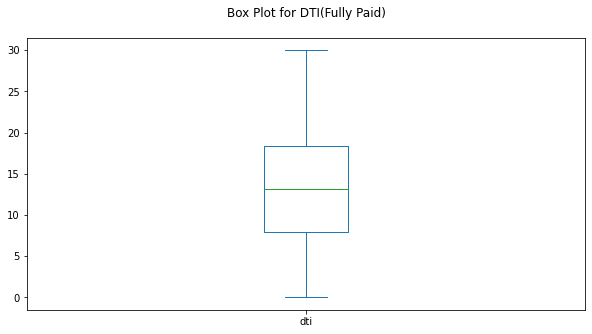

In [254]:
box_plt(data_loan_full,'dti')
plt.title('Box Plot for DTI(Fully Paid)\n')
plt.show()

1) As we can see from the plots and quartiles that charged off consumers have more dti compared to fully paid consumers.

2) If we see from the values obtained 50% of consumers have dti<=14.29(for charged off) and dti<=13.2(for fully paid) where dti(charged off consumers are more) than dti(fully paid consumers). Hence charged off consumers have more monthly debts.

3) If we see from the values obtained 75% of consumers have dti<=19.29(for charged off) and dti<=18.39(for fully paid) where dti(charged off consumers are more) than dti(fully paid consumers). Hence charged off consumers have more monthly debts.

In [255]:
data_loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'pub_rec_bankruptcies'],
      dtype='object')

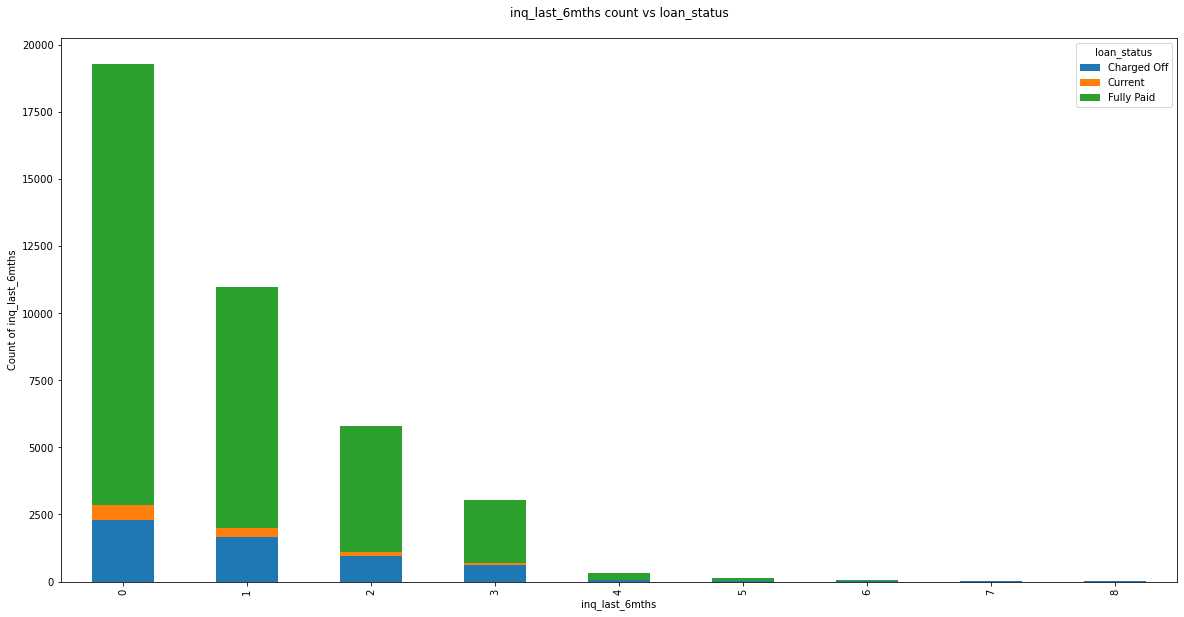

In [256]:
stacked_chart(data_loan,'inq_last_6mths','loan_status')
plt.title('inq_last_6mths count vs loan_status\n')   #creating stacked chart for inq_last_6mths vs loan_status
plt.ylabel('Count of inq_last_6mths')
plt.show()

As we can see from the stacked chart the more inquiry in last 6 months, the lesser consumers will come under charged off.

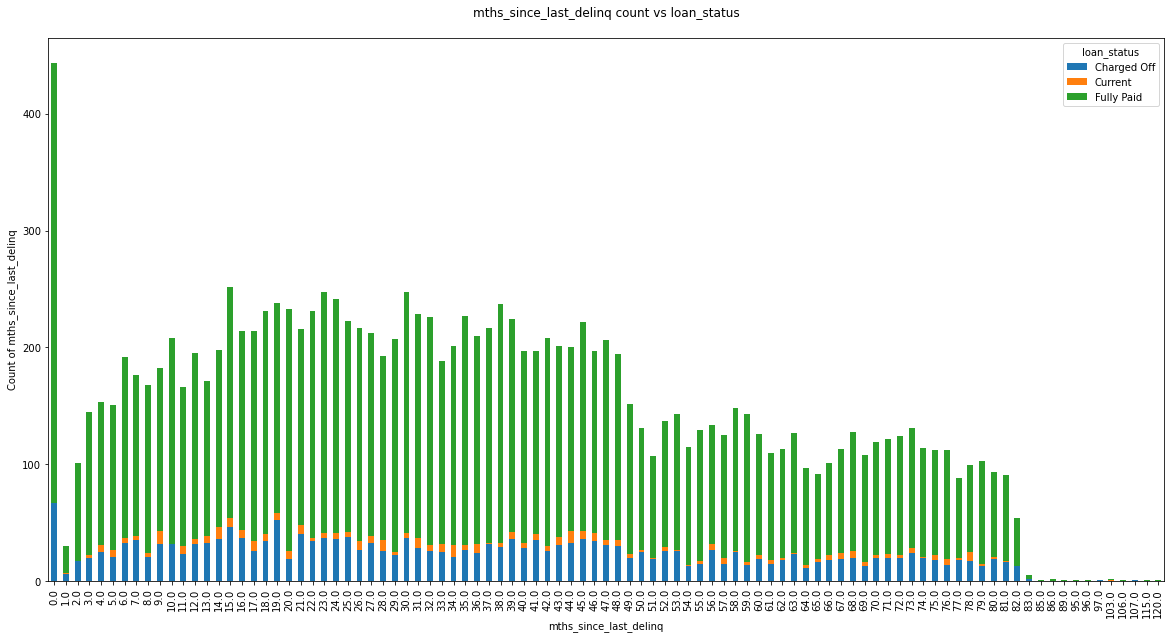

In [257]:
stacked_chart(data_loan,'mths_since_last_delinq','loan_status')
plt.title('mths_since_last_delinq count vs loan_status\n')   #creating stacked chart for mths_since_last_delinq vs loan_status
plt.ylabel('Count of mths_since_last_delinq')
plt.show()

As we can see that consumers in fully paid are more in mnths_since_last_delinq compared to charged off which tells us that icharged off consumers will be less having more mnth_since_last_delinq compared to fully paid consumers

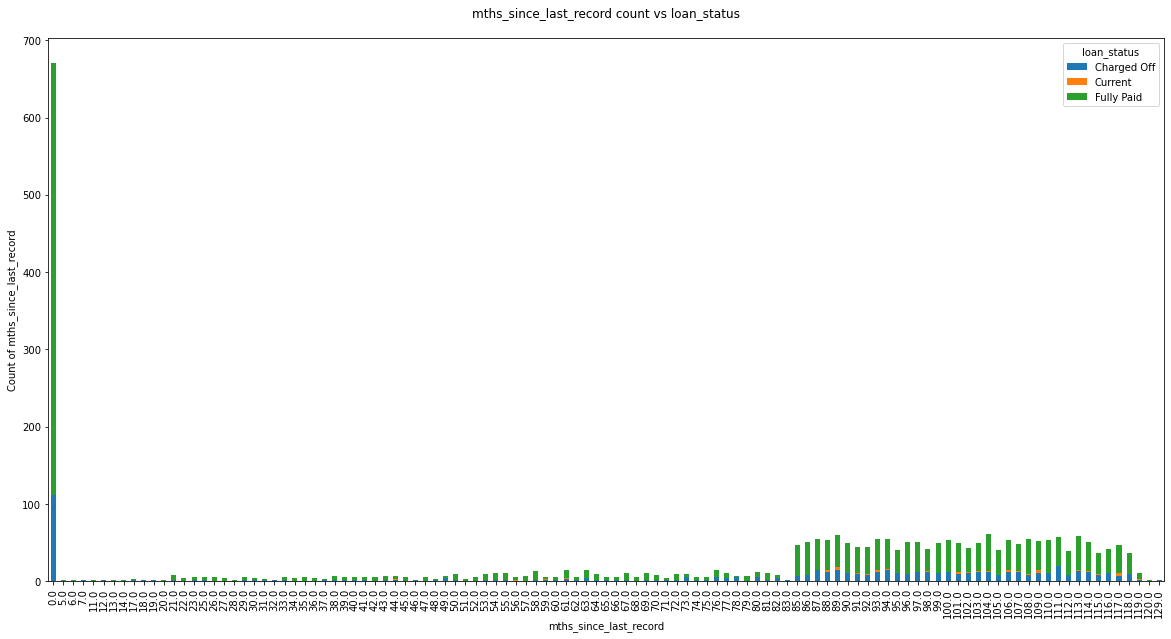

In [258]:
stacked_chart(data_loan,'mths_since_last_record','loan_status')
plt.title('mths_since_last_record count vs loan_status\n')   #creating stacked chart for mths_since_last_record vs loan_status
plt.ylabel('Count of mths_since_last_record')
plt.show()

As we know that public record remain on report for 7-10 years. If we see from the chart that for straight 7 years (84 month) very less consumers in charged off but after 7 years(84 months) there is a slight increase in the charged off consumers.

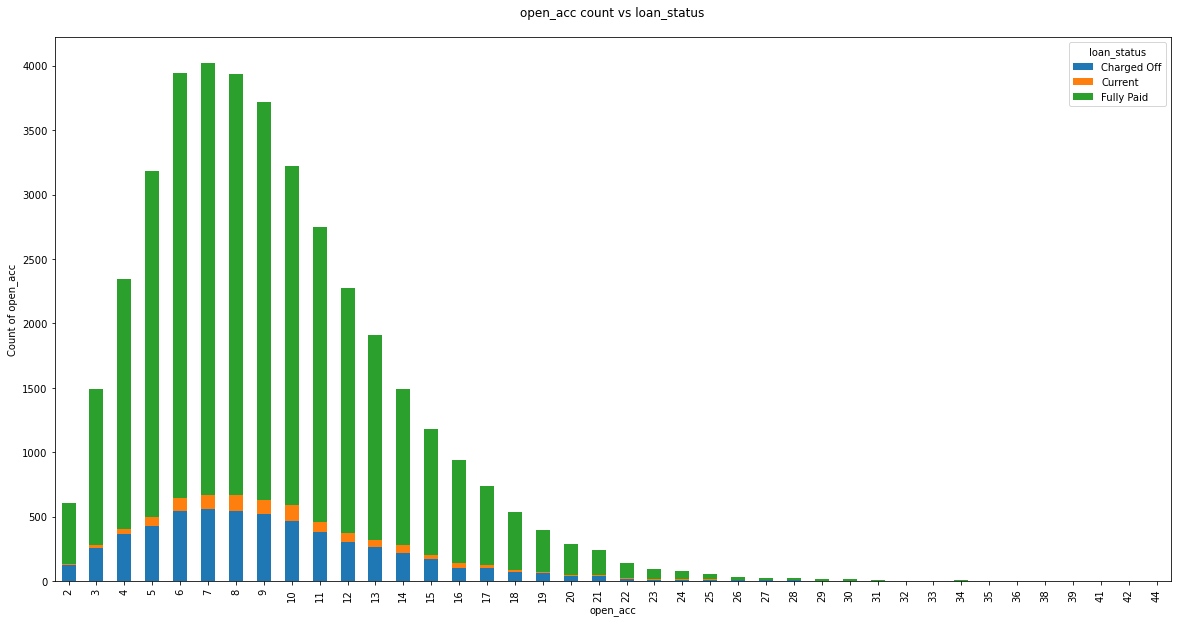

In [259]:
stacked_chart(data_loan,'open_acc','loan_status')
plt.title('open_acc count vs loan_status\n')   #creating stacked chart for open_acc vs loan_status
plt.ylabel('Count of open_acc')
plt.show()

As we can see from the stacked chart that there are less charged off consumers with open accounts whereas more fully paid consumers with open accounts(credit lines).

In [260]:
res = pd.pivot_table(data = data_loan, index = ['loan_status'], values = 'open_acc', aggfunc='sum', margins = True)
cm = sns.light_palette("green", as_cmap = True)  #creating pivot table for loan_status vs open_acc
res.style.background_gradient(cmap = cm)

,open_acc
loan_status,
Charged Off,51645
Current,11328
Fully Paid,306173
All,369146


As we can see that there are large no of open accounts for fully paid and lesser no of open accounts for charged off consumers.

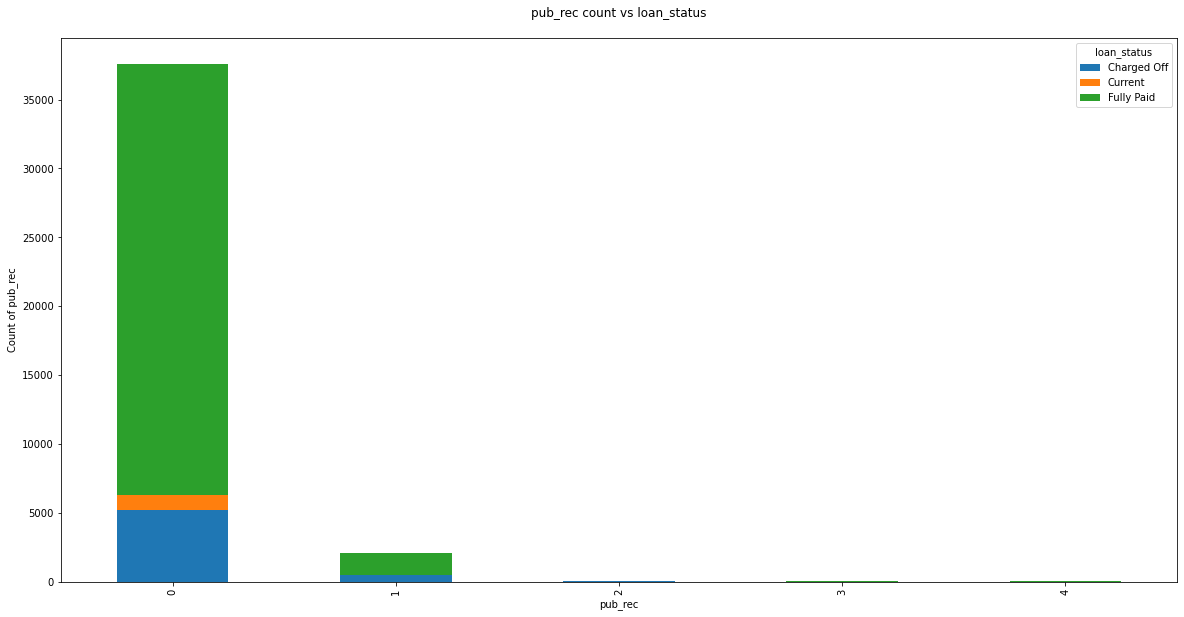

In [261]:
stacked_chart(data_loan,'pub_rec','loan_status')
plt.title('pub_rec count vs loan_status\n')   #creating stacked chart for pub_rec vs loan_status
plt.ylabel('Count of pub_rec')
plt.show()

As we can see from the chart that there are very few no of consumers who have public record in dataset

##### Revolving Balance vs loan_status

In [262]:
q_50,q_75 = calc_quantile(data_loan_charge_off,'revol_bal')

print('50th percentile:', q_50)
print('75th percentile:', q_75)  #50th and 75th percentile for charged off consumers

50th percentile: 9211.0
75th percentile: 17518.0


In [263]:
q_50,q_75 = calc_quantile(data_loan_full,'revol_bal')

print('50th percentile:', q_50)
print('75th percentile:', q_75)  #50th and 75th percentile for fully paid consumers

50th percentile: 8682.5
75th percentile: 16804.75


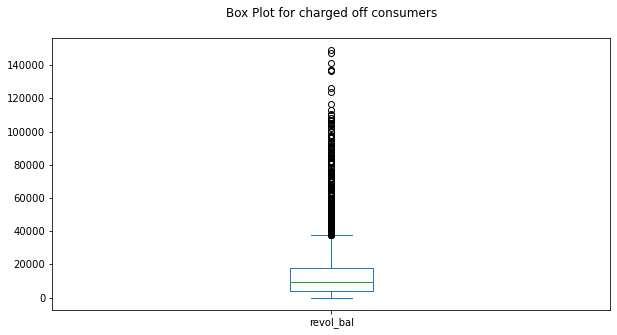

In [264]:
box_plt(data_loan_charge_off,'revol_bal')
plt.title('Box Plot for charged off consumers\n')
plt.show()

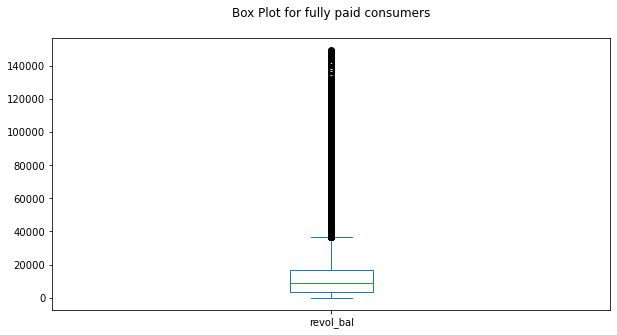

In [265]:
box_plt(data_loan_full,'revol_bal')
plt.title('Box Plot for fully paid consumers\n')
plt.show()

As we can see from the above plots and percentiles 50th & 75th percentile says that charged off consumers have more revolving balance compared to fully paid consumers

##### revol_util vs loan_status

In [266]:
q_50,q_75 = calc_quantile(data_loan_charge_off,'revol_util')

print('50th percentile:', q_50)
print('75th percentile:', q_75)  #50th and 75th percentile for charged off consumers

50th percentile: 0.584
75th percentile: 0.79


In [267]:
q_50,q_75 = calc_quantile(data_loan_full,'revol_util')

print('50th percentile:', q_50)
print('75th percentile:', q_75)  #50th and 75th percentile for fully paid consumers

50th percentile: 0.47600000000000003
75th percentile: 0.708


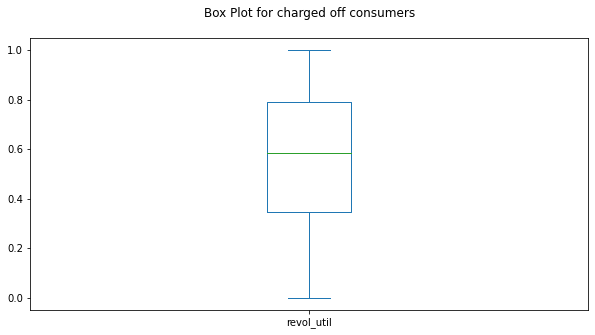

In [268]:
box_plt(data_loan_charge_off,'revol_util')
plt.title('Box Plot for charged off consumers\n')
plt.show()

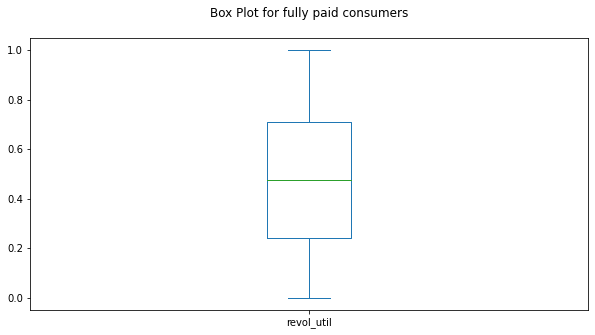

In [269]:
box_plt(data_loan_full,'revol_util')
plt.title('Box Plot for fully paid consumers\n')
plt.show()

As we can see from the plots and 50th & 75th percentile that fully paid consumers have less revolving utilization but there is a high revolving utilization in charged off consumers

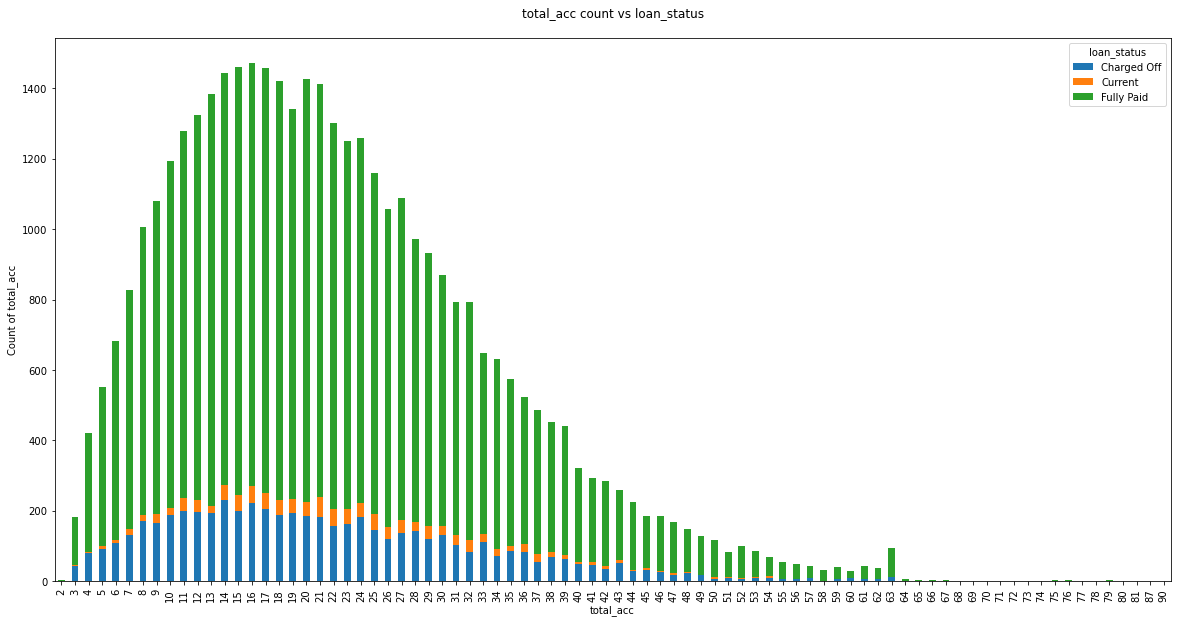

In [270]:
stacked_chart(data_loan,'total_acc','loan_status')
plt.title('total_acc count vs loan_status\n')   #creating stacked chart for total_acc vs loan_status
plt.ylabel('Count of total_acc')
plt.show()

In [271]:
res = pd.pivot_table(data = data_loan, index = ['loan_status'], values = 'total_acc', aggfunc='sum', margins = True)
cm = sns.light_palette("green", as_cmap = True)
res.style.background_gradient(cmap = cm)

,total_acc
loan_status,
Charged Off,120573
Current,26577
Fully Paid,730152
All,877302


As we can see from the charts and pivot table that there are large no of total accounts for fully paid consumers compared to charged off consumers. This can happen because generally charged off consumers will not be eligible much for loan or credit card compared to fully paid consumers.

##### Recoveries vs loan_status

In [272]:
data_rec = data_loan_charge_off.copy()                                   #Replaced where recovery has happened with 1
data_rec['recoveries'] = np.where(data_rec['recoveries']==0,0,1)

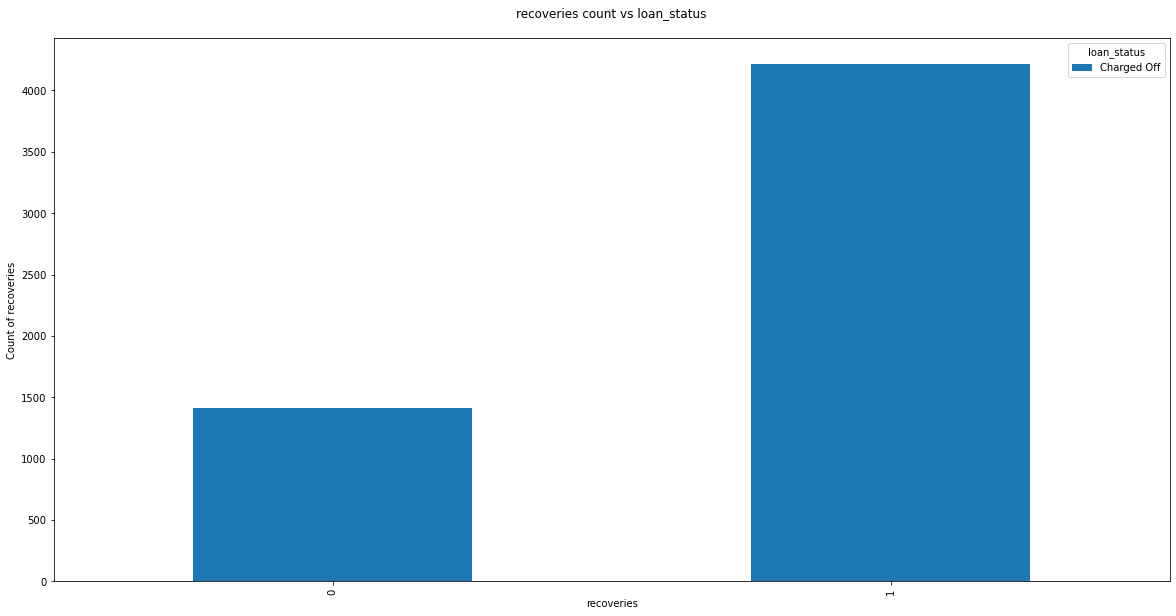

In [273]:
stacked_chart(data_rec,'recoveries','loan_status')
plt.title('recoveries count vs loan_status\n')   #creating stacked chart for recoveries vs loan_status
plt.ylabel('Count of recoveries')
plt.show()

As we can see that some recovery has happened for charged off consumers but there are few consumers with whom there is still a need to recover the loan amount. This can also be a factor while lending loan to any consumer LC can check if the recovery has happened and how much the amount got recovered.

##### pub_rec_bankruptcies

In [274]:
data_bankrup = data_loan.copy()
data_bankrup  = data_bankrup[['pub_rec_bankruptcies','loan_status']]
data_bankrup.head()

,pub_rec_bankruptcies,loan_status
0,0.0,Fully Paid
1,0.0,Charged Off
2,0.0,Fully Paid
3,0.0,Fully Paid
4,0.0,Current


In [275]:
data_bankrup.isnull().sum()  #checking null values

pub_rec_bankruptcies    697
loan_status               0
dtype: int64

In [276]:
data_bankrup[data_bankrup['pub_rec_bankruptcies'].isnull()]  #checking and analysing null values

,pub_rec_bankruptcies,loan_status
35006,NaN,Fully Paid
35058,NaN,Fully Paid
35362,NaN,Charged Off
38443,NaN,Fully Paid
38717,NaN,Fully Paid
...,...,...
39712,NaN,Fully Paid
39713,NaN,Fully Paid
39714,NaN,Fully Paid
39715,NaN,Fully Paid


In [277]:
data_bankrup.dropna(inplace = True)  #dropping null values

In [278]:
data_bankrup.isnull().sum() #checking null values after dropping null values

pub_rec_bankruptcies    0
loan_status             0
dtype: int64

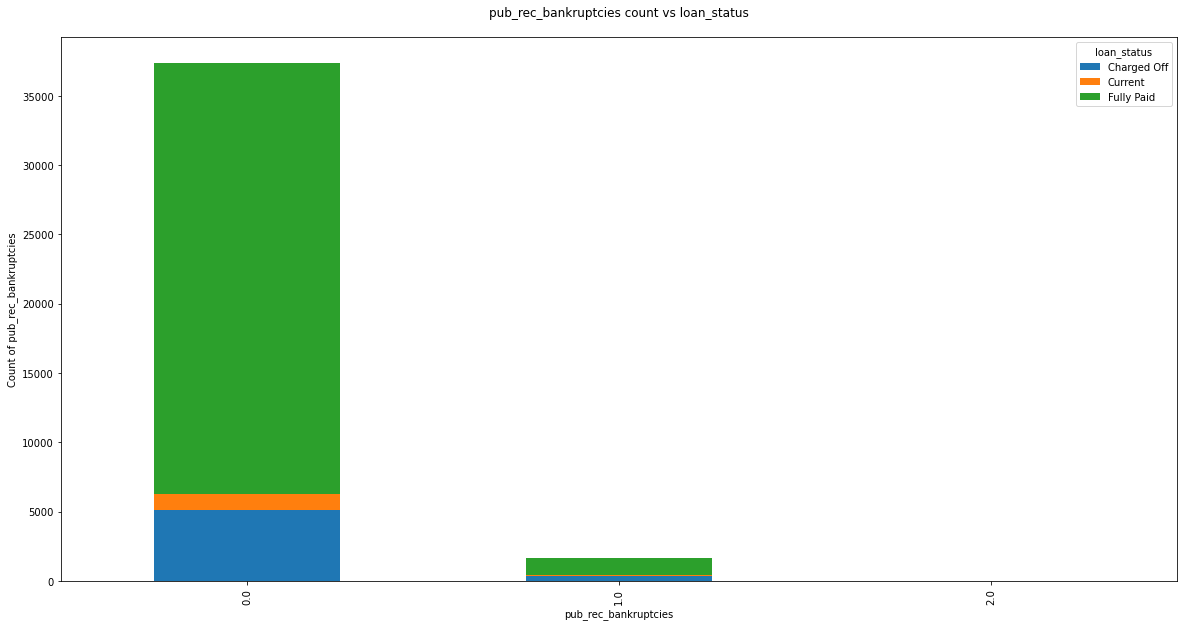

In [279]:
stacked_chart(data_bankrup,'pub_rec_bankruptcies','loan_status')
plt.title('pub_rec_bankruptcies count vs loan_status\n')   #creating stacked chart for pub_rec_bankruptcies vs loan_status
plt.ylabel('Count of pub_rec_bankruptcies')
plt.show()

In [280]:
res = pd.pivot_table(data = data_loan, index = ['loan_status'], values = 'pub_rec_bankruptcies', aggfunc='sum', margins = True)
cm = sns.light_palette("green", as_cmap = True)
res.style.background_gradient(cmap = cm)

,pub_rec_bankruptcies
loan_status,
Charged Off,370.000000
Current,41.000000
Fully Paid,1277.000000
All,1688.000000


As we can see from the chart and pivot table that fully paid consumers have more public recorded bankruptcies which means few of the consumers who have fully paid the loan got bankrupted.

##### Conclusion

Loan attributes: 
sub_grades, verification status,purpose, dti, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, revol_bal, revol_util, total_acc, recoveries, pub_rec_bankruptcies